In [1]:
import matplotlib.pyplot as plt
import numpy as np
import timml

import ttim

plt.rcParams["figure.figsize"] = (10, 4)

### Example strip area-sink

In [2]:
k = [20.0]
H = 10.0
Saq = [0.1]
L = 100.0
N = 1e-3
z = [0, -H]

In [3]:
ml = ttim.ModelMaq(
    kaq=k,
    z=z,
    Saq=Saq,
    # c=c,
    tmin=0.1,
    tmax=1e3,
    topboundary="conf",
    phreatictop=True,
    #M=1
)

left = ttim.StripInhomMaq(
    ml,
    -np.inf,
    -L / 2,
    kaq=k,
    z=z,
    Saq=Saq,
    # c=c,
    topboundary="conf",
    phreatictop=True,
)
inf = ttim.StripInhomMaq(
    ml,
    -L / 2,
    L / 2,
    kaq=k,
    z=z,
    Saq=Saq,
    # c=c,
    topboundary="conf",
    phreatictop=True,
    tsandN=[(0.0, N)],
)
right = ttim.StripInhomMaq(
    ml,
    L / 2,
    np.inf,
    kaq=k,
    z=z,
    Saq=Saq,
    # c=c,
    topboundary="conf",
    phreatictop=True,
)

ml.solve()

self.neq  4
solution complete


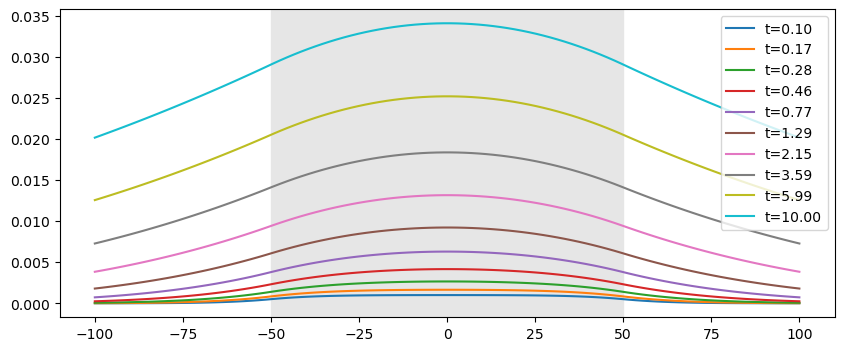

In [4]:
x = np.linspace(-100, 100, 100)
y = np.zeros(100)
plt.axvspan(-50, 50, color=3 * [.9])
for t in np.logspace(-1, 1, 10):
    h = ml.headalongline(x, y, t)
    plt.plot(x, h[0, 0], label=f't={t:.2f}')
plt.legend();

In [5]:
# check solution inside
x = 25
y = 0
t = 7
d = 1e-2

# discharge vector
Qxtim, _ = ml.disvec(x, y, t)
Qxnum = ml.aq.T * (ml.head(x - d, y, t) - ml.head(x + d, y, t)) / (2 * d)
print('Qxtim, Qxnum: ', Qxtim, Qxnum)

# deq
d2hdx2 = (ml.head(x - d, y, t) + ml.head(x + d, y, t) + 
          ml.head(x, y - d, t) + ml.head(x, y + d, t) -
          4 * ml.head(x, y, t)) / d ** 2
dhdt = (ml.head(x, y, t + d) - ml.head(x, y, t - d)) / (2 * d)
print('lhs: ', d2hdx2)
print('rhs: ', ml.aq.Saq / ml.aq.T * dhdt - N / ml.aq.T)

# check solution outside
x = 75
y = 0
t = 7
d = 1e-2

# discharge vector
Qxtim, _ = ml.disvec(x, y, t)
Qxnum = ml.aq.T * (ml.head(x - d, y, t) - ml.head(x + d, y, t)) / (2 * d)
print('Qxtim, Qxnum: ', Qxtim, Qxnum)

# deq
d2hdx2 = (ml.head(x - d, y, t) + ml.head(x + d, y, t) + 
          ml.head(x, y - d, t) + ml.head(x, y + d, t) -
          4 * ml.head(x, y, t)) / d ** 2
dhdt = (ml.head(x, y, t + d) - ml.head(x, y, t - d)) / (2 * d)
print('lhs: ', d2hdx2)
print('rhs: ', ml.aq.Saq / ml.aq.T * dhdt)

Qxtim, Qxnum:  [[0.01914832]] [[0.01914832]]
lhs:  [[-3.83807791e-06]]
rhs:  [[-3.83809051e-06]]
Qxtim, Qxnum:  [[0.03293774]] [[0.03293774]]
lhs:  [[1.06545286e-06]]
rhs:  [[1.06545622e-06]]


### 2 aquifers

In [6]:
k = [10.0, 20.0]
z = [0, -10, -12, -20]
c = [500]
Saq = [0.1, 1e-4]
L = 100.0
N = 1e-3

In [7]:
ml = ttim.ModelMaq(
    kaq=k, z=z, Saq=Saq, c=c,
    topboundary="conf", phreatictop=True,
    tmin=0.1, tmax=1e3, 
)

left = ttim.StripInhomMaq(
    model=ml, x1=-np.inf, x2=-L / 2,
    kaq=k, z=z, Saq=Saq, c=c,
    topboundary="conf", phreatictop=True,
)

inf = ttim.StripInhomMaq(
    model=ml, x1=-L / 2, x2=L / 2,
    kaq=k, z=z, Saq=Saq, c=c,
    topboundary="conf", phreatictop=True,
    tsandN=[(0.0, N)],
)

right = ttim.StripInhomMaq(
    model=ml, x1=L / 2, x2=np.inf,
    kaq=k, z=z, Saq=Saq, c=c,
    topboundary="conf", phreatictop=True,
)

ml.solve()

self.neq  8
solution complete


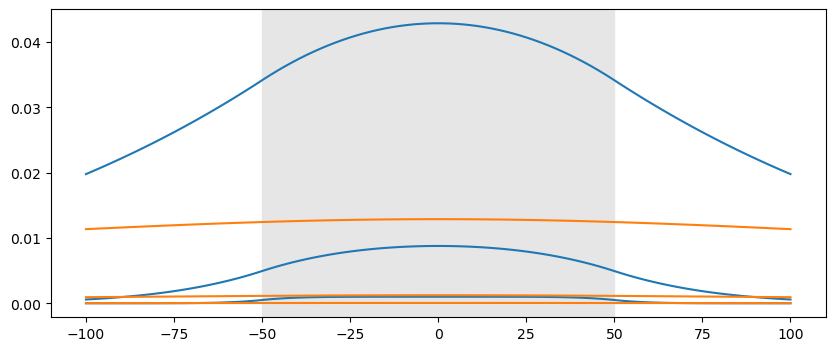

In [8]:
x = np.linspace(-100, 100, 100)
y = np.zeros(100)
plt.axvspan(-50, 50, color=3 * [.9])
t = np.logspace(-1, 1, 3)
h = ml.headalongline(x, y, t)
for i in range(len(t)):
    plt.plot(x, h[0, i], color='C0')
    plt.plot(x, h[1, i], color='C1')

In [9]:
print('check solution inside')
x = 25
y = 0
t = 0.7
d = 1e-3
dt = 0.001

# discharge vector
Qxtim, _ = ml.disvec(x, y, t)
Qxnum = ml.aq.Tcol * (ml.head(x - d, y, t) - ml.head(x + d, y, t)) / (2 * d)
print('Qxtim: ', Qxtim[:, 0])
print('Qxnum: ', Qxnum[:, 0])

# deq
d2hdx2 = (ml.head(x - d, y, t) + ml.head(x + d, y, t) + 
          ml.head(x, y - d, t) + ml.head(x, y + d, t) -
          4 * ml.head(x, y, t)) / d ** 2
dhdt = (ml.head(x, y, t + dt) - ml.head(x, y, t - dt)) / (2 * dt)
h = ml.head(x, y, t)
rhs1 = ml.aq.Saq[0] / ml.aq.T[0] * dhdt[0, 0]  + (h[0, 0] - h[1, 0]) / (ml.aq.T[0] * ml.aq.c[1]) - N / ml.aq.T[0]
rhs2 = ml.aq.Saq[1] * ml.aq.Haq[1] / ml.aq.T[1] * dhdt[1, 0]  - (h[0, 0] - h[1, 0]) / (ml.aq.T[1] * ml.aq.c[1])
print('lhs: ', d2hdx2[:, 0])
print('rhs: ', rhs1, rhs2)

print('check solution outside')
x = 75
y = 0
t = 0.7
d = 0.01
dt = 0.01

# discharge vector
Qxtim, _ = ml.disvec(x, y, t)
Qxnum = ml.aq.Tcol * (ml.head(x - d, y, t) - ml.head(x + d, y, t)) / (2 * d)
print('Qxtim: ', Qxtim[:, 0])
print('Qxnum: ', Qxnum[:, 0])

# deq
d2hdx2 = (ml.head(x - d, y, t) + ml.head(x + d, y, t) + 
          ml.head(x, y - d, t) + ml.head(x, y + d, t) -
          4 * ml.head(x, y, t)) / d ** 2
dhdt = (ml.head(x, y, t + dt) - ml.head(x, y, t - dt)) / (2 * dt)
h = ml.head(x, y, t)
rhs1 = ml.aq.Saq[0] / ml.aq.T[0] * dhdt[0, 0]  + (h[0, 0] - h[1, 0]) / (ml.aq.T[0] * ml.aq.c[1])
rhs2 = ml.aq.Saq[1] * ml.aq.Haq[1] / ml.aq.T[1] * dhdt[1, 0]  - (h[0, 0] - h[1, 0]) / (ml.aq.T[1] * ml.aq.c[1])
print('lhs: ', d2hdx2[:, 0])
print('rhs: ', rhs1, rhs2)

check solution inside
Qxtim:  [0.00528708 0.00024616]
Qxnum:  [0.00528708 0.00024616]
lhs:  [-2.72898024e-06 -5.66161701e-08]
rhs:  -2.729246969590678e-06 -5.660308111144035e-08
check solution outside
Qxtim:  [0.00559443 0.00046795]
Qxnum:  [0.00559443 0.00046795]
lhs:  [2.50199868e-06 1.18881467e-09]
rhs:  2.501948504638927e-06 1.1887430107039933e-09
